## Feature selection using Lasso And Ridge

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/Preprocessed_thyroid_data.csv')

In [4]:
non_numeric_cols = df.select_dtypes(exclude='number').columns

In [5]:
non_numeric_cols

Index(['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured',
       'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured',
       'TBG_measured', 'referral_source', 'classes'],
      dtype='object')

In [6]:
ordinal_encode_col = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured',
       'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured',
       'TBG_measured', 'referral_source']
label_encoded_col = ['classes']

In [7]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
ordinal_encode = OrdinalEncoder()
label_encode = LabelEncoder()

In [8]:
# Fit and transform the non-numeric columns
df[ordinal_encode_col] = ordinal_encode.fit_transform(df[ordinal_encode_col])

In [9]:
df['classes'] = label_encode.fit_transform(df['classes'])

In [10]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,classes
0,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.50,1.0,125,1.0,1.14,1.0,109,0.0,1.0,1
1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.00,1.0,102,0.0,1.00,0.0,110,0.0,4.0,1
2,46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.02,1.0,109,1.0,0.91,1.0,120,0.0,4.0,1
3,70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.90,1.0,175,0.0,1.00,0.0,110,0.0,4.0,1
4,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.20,1.0,61,1.0,0.87,1.0,70,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.70,1.0,167,1.0,1.21,1.0,137,0.0,4.0,1
2662,70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.02,1.0,155,1.0,1.05,1.0,148,0.0,3.0,1
2663,73,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.70,1.0,63,1.0,0.88,1.0,72,0.0,4.0,1
2664,75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.02,1.0,147,1.0,0.80,1.0,183,0.0,4.0,1


In [11]:
X = df.iloc[:,:-1]
Y = df[['classes']]

In [12]:
X

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source
0,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.50,1.0,125,1.0,1.14,1.0,109,0.0,1.0
1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.00,1.0,102,0.0,1.00,0.0,110,0.0,4.0
2,46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.02,1.0,109,1.0,0.91,1.0,120,0.0,4.0
3,70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.90,1.0,175,0.0,1.00,0.0,110,0.0,4.0
4,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.20,1.0,61,1.0,0.87,1.0,70,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.70,1.0,167,1.0,1.21,1.0,137,0.0,4.0
2662,70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.02,1.0,155,1.0,1.05,1.0,148,0.0,3.0
2663,73,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.70,1.0,63,1.0,0.88,1.0,72,0.0,4.0
2664,75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.02,1.0,147,1.0,0.80,1.0,183,0.0,4.0


In [13]:
Y

,classes
0,1
1,1
2,1
3,1
4,1
...,...
2661,1
2662,1
2663,1
2664,1


In [14]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [15]:
X_train

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source
1855,67,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.02,1.0,124,1.0,1.04,1.0,119,0.0,4.0
2244,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.30,1.0,86,1.0,0.87,1.0,99,0.0,4.0
2525,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.02,1.0,84,1.0,0.90,1.0,94,0.0,4.0
961,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.90,1.0,142,1.0,0.91,1.0,156,0.0,4.0
1618,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.10,1.0,77,1.0,1.10,1.0,70,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,42,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.02,1.0,135,1.0,0.66,1.0,206,0.0,4.0
1095,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.02,0.0,109,0.0,1.00,0.0,110,0.0,4.0
1130,71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.60,1.0,164,1.0,1.11,1.0,148,0.0,4.0
1294,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.70,1.0,97,1.0,0.76,1.0,129,0.0,3.0


In [16]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [17]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [18]:
# Get feature coefficients
lasso_coef = lasso.coef_
ridge_coef = ridge.coef_


In [19]:
lasso_coef

array([ 1.53503484e-05,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.64339597e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -3.10514474e-04, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [20]:
ridge_coef

array([[ 6.94798673e-04,  2.03527136e-02,  8.50645809e-02,
        -4.84198351e-02, -1.00689478e-02, -8.11022683e-02,
         3.51139731e-02,  7.04461609e-02,  2.33574443e-02,
        -8.27924680e-02,  1.77847669e-02, -8.79614889e-02,
         2.71498708e-02, -6.76096780e-03,  5.47696223e-02,
        -3.46589508e-02, -5.82960128e-02,  2.77592242e-03,
         1.87368595e-02,  1.17756537e-04, -1.85809131e-02,
        -2.11217028e-03,  5.34555086e-03,  1.88871444e-01,
        -7.07081352e-04,  1.55695316e-03,  0.00000000e+00,
        -2.02090225e-02]])

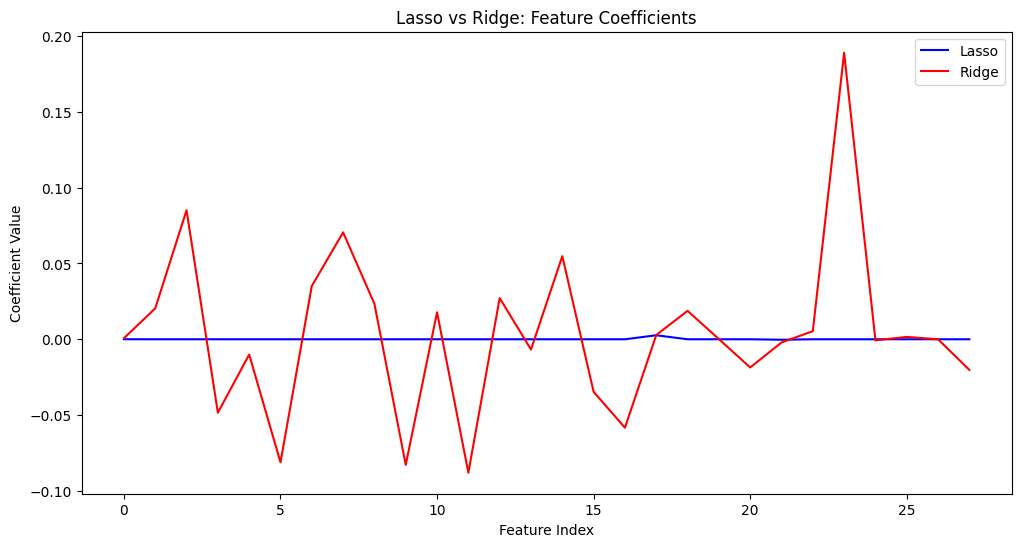

In [28]:
# Ensure coefficients are 1D arrays
lasso_coef = np.ravel(lasso.coef_)
ridge_coef = np.ravel(ridge.coef_)

# Plot feature coefficients
plt.figure(figsize=(12, 6))
plt.plot(range(len(lasso_coef)), lasso_coef, 'b-', label='Lasso')
plt.plot(range(len(ridge_coef)), ridge_coef, 'r-', label='Ridge')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso vs Ridge: Feature Coefficients')
plt.legend()
plt.show()

In [29]:
# Print selected features (non-zero coefficients)
print("Lasso selected features:", np.where(lasso_coef != 0)[0])
print("Ridge selected features:", np.where(ridge_coef != 0)[0])

Lasso selected features: [ 0 17 21]
Ridge selected features: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27]


In [30]:
# Evaluate models
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)

In [31]:
lasso_pred

array([0.97495326, 0.96955654, 0.97223183, 0.96433808, 0.96122064,
       0.96051411, 0.96032281, 0.96891183, 0.96477441, 0.96919646,
       0.97034757, 0.96368639, 0.9642387 , 0.95605912, 0.95472752,
       0.97503022, 0.95263277, 0.95970405, 0.96417479, 0.96904998,
       0.94691432, 0.96631204, 0.93047522, 0.96897323, 0.98250039,
       0.96439007, 0.94442069, 0.96422712, 0.96895544, 0.9679835 ,
       0.95597911, 0.96062073, 0.96950549, 0.95439141, 0.96077387,
       0.94876355, 0.96133098, 0.96718128, 0.9676127 , 0.95380778,
       0.95675855, 0.96608934, 0.95677378, 0.96607036, 0.98767725,
       0.96935699, 0.9652475 , 0.97154849, 0.95238733, 0.96216803,
       0.97637602, 0.94913157, 0.96265016, 0.9588743 , 0.95030114,
       0.97283033, 0.97049266, 0.97062664, 1.03500043, 0.96905068,
       0.96900393, 0.95165989, 0.94797997, 0.961471  , 0.98115654,
       0.95584653, 0.96782083, 0.98343185, 0.96595799, 0.93837742,
       0.94824551, 0.9830237 , 0.97314807, 0.95397399, 0.95621

In [32]:
ridge_pred

array([[0.96094493],
       [1.00581369],
       [0.98083481],
       [0.90586645],
       [0.95180698],
       [0.97679003],
       [0.95711798],
       [0.97663214],
       [0.90849692],
       [0.93354385],
       [1.0155921 ],
       [0.97014457],
       [0.97747066],
       [0.95431373],
       [1.02108092],
       [0.96562021],
       [0.93254752],
       [0.92846531],
       [0.94021694],
       [0.98288533],
       [1.01272555],
       [0.94461256],
       [0.93336096],
       [0.97941134],
       [0.8967726 ],
       [0.98804315],
       [1.06334072],
       [0.97513762],
       [0.99365043],
       [0.97227289],
       [0.91398089],
       [0.95235052],
       [0.92486173],
       [0.94038867],
       [0.99141698],
       [0.99311498],
       [1.02328199],
       [0.93926049],
       [0.93849923],
       [0.89672058],
       [0.94454868],
       [0.96625384],
       [0.82678227],
       [0.97963114],
       [1.01221076],
       [0.9967813 ],
       [0.96188915],
       [0.973

In [33]:
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))

Lasso MSE: 0.08360532207145831
Ridge MSE: 0.08522932946398429


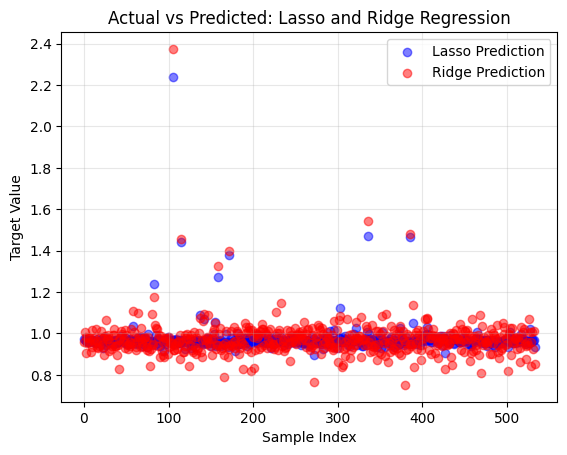

In [38]:
# Create a range for the x-axis (sample index)
# Create a range for the x-axis (sample index)
x_range = range(len(y_test))

# Plot Lasso predictions
plt.scatter(x_range, lasso_pred, color='blue', label='Lasso Prediction', alpha=0.5)

# Plot Ridge predictions
plt.scatter(x_range, ridge_pred, color='red', label='Ridge Prediction', alpha=0.5)

plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted: Lasso and Ridge Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

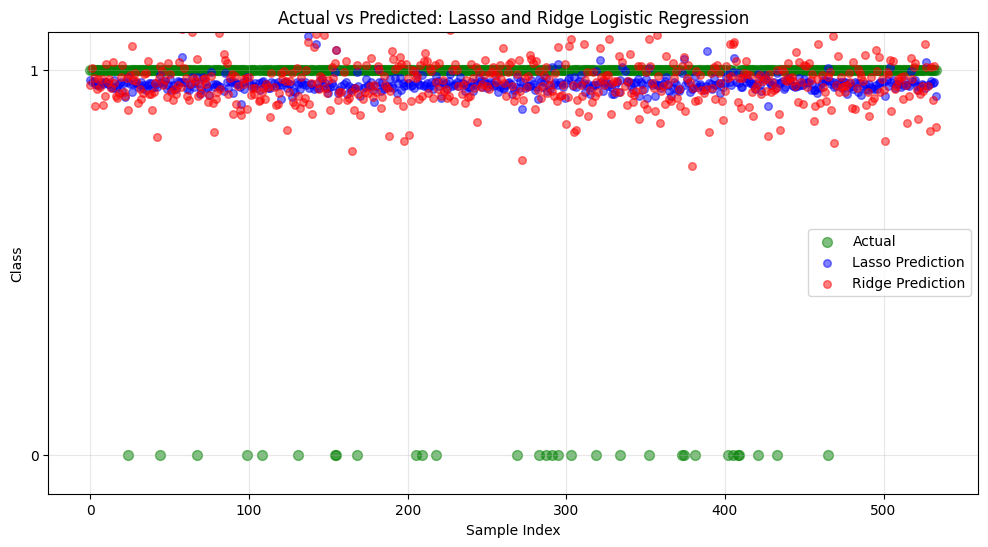

In [42]:
import matplotlib.pyplot as plt

# Create a range for the x-axis (sample index)
x_range = range(len(y_test))

# Create the plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.scatter(x_range, y_test, color='green', label='Actual', alpha=0.5, s=50)

# Plot Lasso predictions
plt.scatter(x_range, lasso_pred, color='blue', label='Lasso Prediction', alpha=0.5, s=30)

# Plot Ridge predictions
plt.scatter(x_range, ridge_pred, color='red', label='Ridge Prediction', alpha=0.5, s=30)

plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted: Lasso and Ridge Logistic Regression')
plt.legend()
plt.grid(True, alpha=0.3)

# Adjust y-axis to show clear separation between classes
plt.yticks([0, 1])
plt.ylim(-0.1, 1.1)

plt.show()